<a href="https://colab.research.google.com/github/ChitteshKumar/udemy_deep_learning_tutorials/blob/main/LongDistanceProblem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## LONG DISTANCE PROBLEM


In [1]:
from tensorflow.keras.layers import Input,Dense,SimpleRNN,LSTM, GRU, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#dataset
T = 10
D = 1
X=[]
Y = []
def get_label(x, i1,i2,i3):
  #here x is a sequence
  if x[i1] < 0 and x[i2] < 0 and x[i3] < 0:
    return 1
  if x[i1] < 0 and x[i2] > 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] < 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] > 0 and x[i3] < 0:
    return 1
  else:
    return 0

for i in range(5000):
  x = np.random.randn(T) #random noise
  X.append(x)
  y= get_label(x,-1,-2,-3) #for short distance (last three data points in the sequence)
  # y= get_label(x,0,1,2) #for long distance (first three data points in the sequence)
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

# in this problem, we consider the sign of the value (> or < 0) (each quadrant representing a class)


In [3]:
#trying the linear model
input = Input(shape=(T,))
output = Dense(1, activation='sigmoid')(input)
model = Model(input, output)
model.compile(
    loss = 'binary_crossentropy',
    optimizer = Adam(learning_rate=0.01),
    metrics = ['accuracy'],
)

r = model.fit(
    X, Y,
    epochs = 100,
    validation_split=0.5
)



Epoch 1/100
79/79 [==============================] - 1s 6ms/step - loss: 0.8149 - accuracy: 0.4936 - val_loss: 0.7026 - val_accuracy: 0.5192
Epoch 2/100
79/79 [==============================] - 1s 6ms/step - loss: 0.6951 - accuracy: 0.5188 - val_loss: 0.6994 - val_accuracy: 0.5056
Epoch 3/100
79/79 [==============================] - 1s 11ms/step - loss: 0.6910 - accuracy: 0.5336 - val_loss: 0.7019 - val_accuracy: 0.4944
Epoch 4/100
79/79 [==============================] - 1s 15ms/step - loss: 0.6899 - accuracy: 0.5368 - val_loss: 0.6998 - val_accuracy: 0.5020
Epoch 5/100
79/79 [==============================] - 1s 9ms/step - loss: 0.6914 - accuracy: 0.5368 - val_loss: 0.7013 - val_accuracy: 0.5052
Epoch 6/100
79/79 [==============================] - 1s 7ms/step - loss: 0.6913 - accuracy: 0.5228 - val_loss: 0.7001 - val_accuracy: 0.4984
Epoch 7/100
79/79 [==============================] - 0s 5ms/step - loss: 0.6907 - accuracy: 0.5332 - val_loss: 0.7041 - val_accuracy: 0.4944
Epoch 8/100

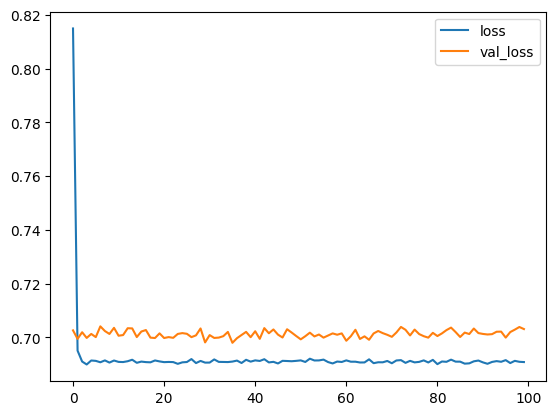

In [4]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

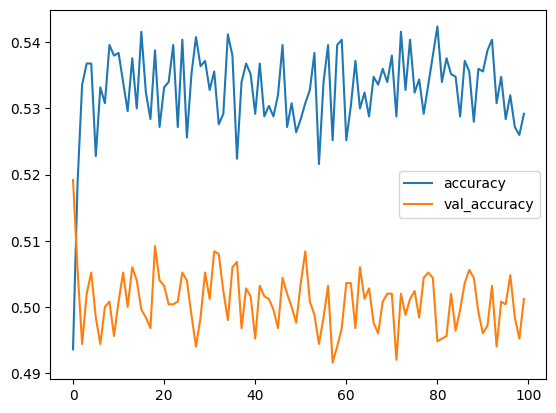

In [5]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

In [6]:
#trying the SimpleRNN
inputs = np.expand_dims(X,-1)

input = Input(shape=(T,D))

#method-1
#output = LSTM(5)(input)
output = SimpleRNN(5)(input)
#output = GRU(5)(input)

#method-2
#output = LSTM(5, return_sequences=True)(input)
#output = GlobalMaxPool1D()(output)

output = Dense(1, activation='sigmoid')(output)
model = Model(input, output)
model.compile(
    loss = 'binary_crossentropy',
    optimizer = Adam(learning_rate=0.01), #SGD can also be used
    metrics = ['accuracy'],
)

#train the model
r = model.fit(
    inputs,Y,
    epochs=200,
    validation_split=0.5
)

Epoch 1/200
79/79 [==============================] - 2s 9ms/step - loss: 0.6889 - accuracy: 0.5376 - val_loss: 0.6897 - val_accuracy: 0.5464
Epoch 2/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6788 - accuracy: 0.5752 - val_loss: 0.6729 - val_accuracy: 0.5976
Epoch 3/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6632 - accuracy: 0.6160 - val_loss: 0.6549 - val_accuracy: 0.6248
Epoch 4/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6376 - accuracy: 0.6668 - val_loss: 0.6117 - val_accuracy: 0.6816
Epoch 5/200
79/79 [==============================] - 1s 8ms/step - loss: 0.5725 - accuracy: 0.7380 - val_loss: 0.5264 - val_accuracy: 0.7872
Epoch 6/200
79/79 [==============================] - 1s 8ms/step - loss: 0.4702 - accuracy: 0.8228 - val_loss: 0.4048 - val_accuracy: 0.8676
Epoch 7/200
79/79 [==============================] - 1s 7ms/step - loss: 0.3616 - accuracy: 0.8764 - val_loss: 0.3114 - val_accuracy: 0.9084
Epoch 8/200
7

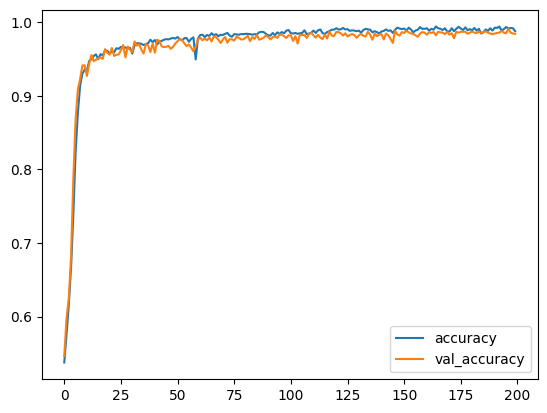

In [7]:
#plot the accuracy
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

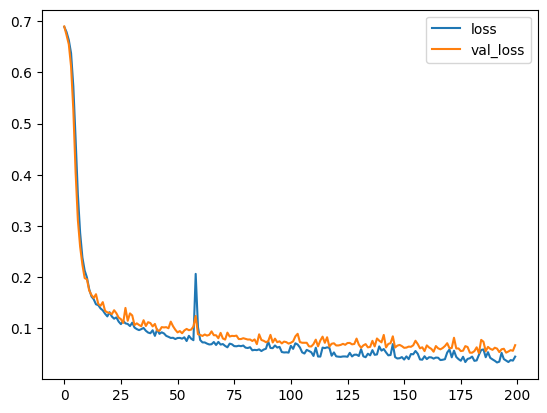

In [8]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [9]:
#building dataset - long distance
T = 10 #sequence length
D = 1
X = []
Y = []

for i in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x,0,1,2) #long dist., first three data from the sequence.
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [10]:
#trying simple RNN - for long distance
inputs = np.expand_dims(X,-1) #expand dimensions
i = Input(shape=(T,D))
x = SimpleRNN(5)(i)
x = Dense(1, activation='sigmoid')(x)
model = Model(i,x)
model.compile(
    loss = 'binary_crossentropy',
    optimizer = Adam(learning_rate = 0.01),
    metrics = ['accuracy']
)

#train the model
r = model.fit(
    inputs,Y,
    epochs=200,
    validation_split=0.5
)

Epoch 1/200
79/79 [==============================] - 2s 9ms/step - loss: 0.7137 - accuracy: 0.5052 - val_loss: 0.6940 - val_accuracy: 0.5092
Epoch 2/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6955 - accuracy: 0.5132 - val_loss: 0.6942 - val_accuracy: 0.5264
Epoch 3/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6944 - accuracy: 0.5048 - val_loss: 0.6924 - val_accuracy: 0.5160
Epoch 4/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6943 - accuracy: 0.5136 - val_loss: 0.6942 - val_accuracy: 0.5136
Epoch 5/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6948 - accuracy: 0.5160 - val_loss: 0.6926 - val_accuracy: 0.5204
Epoch 6/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6936 - accuracy: 0.5076 - val_loss: 0.6916 - val_accuracy: 0.5248
Epoch 7/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6944 - accuracy: 0.5168 - val_loss: 0.6938 - val_accuracy: 0.5176
Epoch 8/200
7

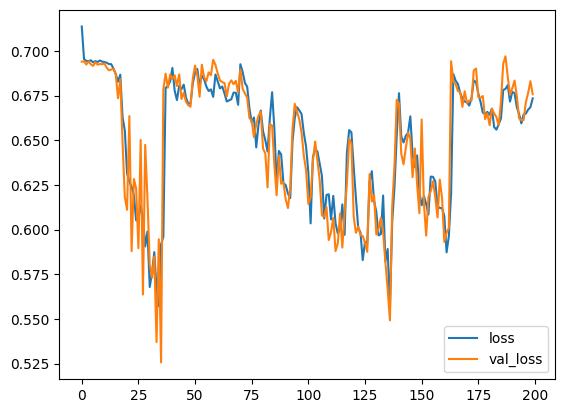

In [11]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

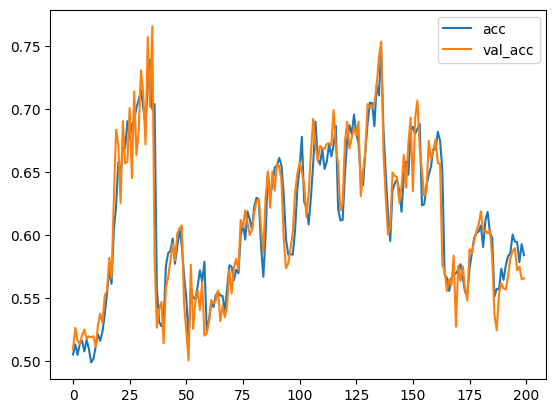

In [12]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

# Here we get to know that in long distance data, it is harder for RNN to learn the data. Sometimes it does not learn at all.

In [13]:
#trying LSTM - long distance
inputs = np.expand_dims(X,-1) #expand dimensions
i = Input(shape=(T,D))
x = LSTM(5)(i)
x = Dense(1, activation='sigmoid')(x)
model = Model(i,x)
model.compile(
    loss = 'binary_crossentropy',
    optimizer = Adam(learning_rate = 0.01),
    metrics = ['accuracy']
)

#train the model
r = model.fit(
    inputs,Y,
    epochs=200,
    validation_split=0.5
)

Epoch 1/200
79/79 [==============================] - 4s 17ms/step - loss: 0.6942 - accuracy: 0.4860 - val_loss: 0.6936 - val_accuracy: 0.4956
Epoch 2/200
79/79 [==============================] - 1s 11ms/step - loss: 0.6935 - accuracy: 0.5056 - val_loss: 0.6934 - val_accuracy: 0.5016
Epoch 3/200
79/79 [==============================] - 1s 13ms/step - loss: 0.6935 - accuracy: 0.4904 - val_loss: 0.6929 - val_accuracy: 0.5036
Epoch 4/200
79/79 [==============================] - 1s 13ms/step - loss: 0.6934 - accuracy: 0.5000 - val_loss: 0.6930 - val_accuracy: 0.5172
Epoch 5/200
79/79 [==============================] - 1s 11ms/step - loss: 0.6934 - accuracy: 0.4896 - val_loss: 0.6928 - val_accuracy: 0.5088
Epoch 6/200
79/79 [==============================] - 1s 11ms/step - loss: 0.6939 - accuracy: 0.5052 - val_loss: 0.6929 - val_accuracy: 0.5084
Epoch 7/200
79/79 [==============================] - 1s 11ms/step - loss: 0.6936 - accuracy: 0.5004 - val_loss: 0.6930 - val_accuracy: 0.4980
Epoch 

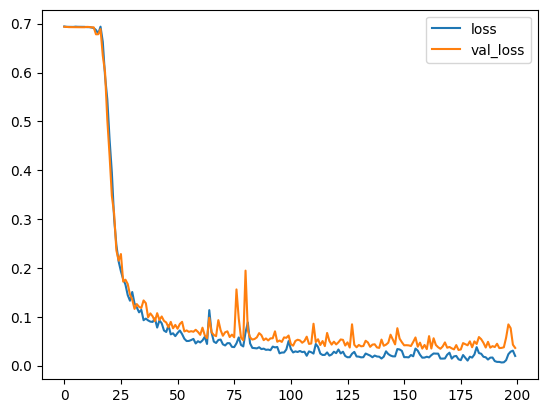

In [14]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

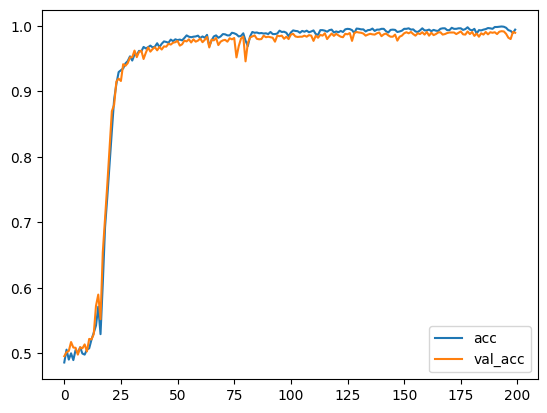

In [15]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()


#with LSTM, we achieve a better accuracy in long dist as compared to RNN (since it is able to learn the long pattern)

In [17]:
#now we increase the sequence length
T = 20
D = 1
X = []
Y = []

for i in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x,0,1,2) #long dist.
  Y.append(y)

#array conversion
Y = np.array(Y)
X = np.array(X)
N = len(X)

In [21]:
# Note- RNN is used to process sequential data
# Note - shape=(T,) -> the input layer is of the (T,) where T is sequence length and comma represents a single element tuple

#now we test SimpleRNN on the new sequence
inputs = np.expand_dims(X, -1) # here a new dimension is added to X array (-1 refers to the last of the array).

i = Input(shape=(T,D)) #here the input layer is of the (T,D) where T is sequence length and D represents no. of features.
x = SimpleRNN(5)(i) #RNN layer with 5 units per neuron applied to each i
x = Dense(1, activation='sigmoid')(x) # 1 unit in the output layer

model = Model(i,x)
model.compile(
    loss = 'binary_crossentropy',
    optimizer = Adam(learning_rate=0.01),
    metrics = ['accuracy'],
)

#train the model
r = model.fit(
    inputs, Y,    # input data and corresponding target label
    epochs = 200, validation_split=0.5 #here half of the data is used to validation and other half is used for actual training
)

Epoch 1/200
79/79 [==============================] - 2s 10ms/step - loss: 0.6999 - accuracy: 0.5004 - val_loss: 0.6951 - val_accuracy: 0.4964
Epoch 2/200
79/79 [==============================] - 1s 7ms/step - loss: 0.6939 - accuracy: 0.4976 - val_loss: 0.6950 - val_accuracy: 0.4960
Epoch 3/200
79/79 [==============================] - 1s 9ms/step - loss: 0.6942 - accuracy: 0.5152 - val_loss: 0.6945 - val_accuracy: 0.5024
Epoch 4/200
79/79 [==============================] - 1s 7ms/step - loss: 0.6935 - accuracy: 0.5180 - val_loss: 0.6944 - val_accuracy: 0.5060
Epoch 5/200
79/79 [==============================] - 1s 9ms/step - loss: 0.6937 - accuracy: 0.5128 - val_loss: 0.6936 - val_accuracy: 0.5096
Epoch 6/200
79/79 [==============================] - 1s 7ms/step - loss: 0.6934 - accuracy: 0.5108 - val_loss: 0.6937 - val_accuracy: 0.4972
Epoch 7/200
79/79 [==============================] - 1s 7ms/step - loss: 0.6932 - accuracy: 0.5100 - val_loss: 0.6932 - val_accuracy: 0.5012
Epoch 8/200


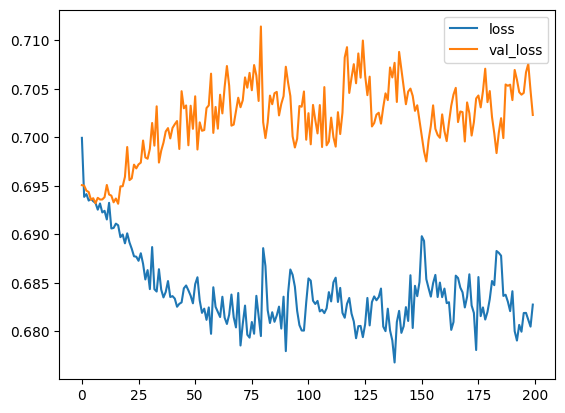

In [23]:
#plot loss vs val_loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()


'''
Note:
loss - training loss, how well the prediction is matching with the target value in the training set
          -> (diff b/w predicted and actual value).
          -> goal is to minimise this loss, generally loss decreases as the iteration/epochs increases.

val_loss - validation loss, how well the model generalizes the unseen data
          -> where is this unseen data? = data which is not used in training thus model has not seen this data, this helps to compute the validation loss.
          -> determines whether the model is overfitted (i.e. model is not performing well with unseen data).
          -> increase in the value indicates the model overfits (even if loss is decreasing) -> can be resolved by regularisation/adjusting hyperparameter.
'''

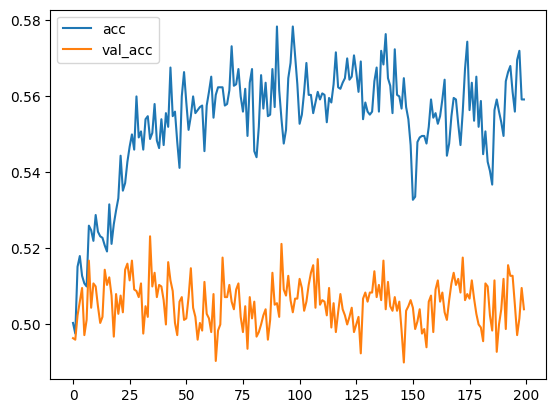

In [24]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label = "val_acc")
plt.legend()

'''
Note:
accuracy (training accuracy) - overall correctness of the model's prediction.
            -> ratio of correctly predicted values / total no. of values in the dataset.

val_accuracy (validation accuracy) - correctness of the model's prediction with validation dataset
            -> ratio of correctly predicted values / total no. of values in the validation dataset.

* a higher training accuracy with lowers validation accuracy may indicate overfitting where model has memorized the training data rather than learning the data pattern.
'''

#here RNN completely fails

In [25]:
#now we use LSTM for new sequence
inputs = np.expand_dims(X, -1) # here a new dimension is added to X array (-1 refers to the last of the array).

i = Input(shape=(T,D)) #here the input layer is of the (T,D) where T is sequence length and D represents no. of features.
x = LSTM(5)(i) #LSTM layer with 5 units per neuron applied to each i
x = Dense(1, activation='sigmoid')(x) # 1 unit in the output layer

model = Model(i,x)
model.compile(
    loss = 'binary_crossentropy',
    optimizer = Adam(learning_rate=0.01),
    metrics = ['accuracy'],
)

#train the model
r = model.fit(
    inputs, Y,    # input data and corresponding target label
    epochs = 200, validation_split=0.5 #here half of the data is used to validation and other half is used for actual training
)

Epoch 1/200
79/79 [==============================] - 5s 28ms/step - loss: 0.6937 - accuracy: 0.4956 - val_loss: 0.6939 - val_accuracy: 0.4976
Epoch 2/200
79/79 [==============================] - 1s 18ms/step - loss: 0.6927 - accuracy: 0.5008 - val_loss: 0.6941 - val_accuracy: 0.5040
Epoch 3/200
79/79 [==============================] - 1s 13ms/step - loss: 0.6933 - accuracy: 0.5052 - val_loss: 0.6932 - val_accuracy: 0.5124
Epoch 4/200
79/79 [==============================] - 1s 14ms/step - loss: 0.6932 - accuracy: 0.5104 - val_loss: 0.6935 - val_accuracy: 0.5016
Epoch 5/200
79/79 [==============================] - 1s 14ms/step - loss: 0.6929 - accuracy: 0.5128 - val_loss: 0.6932 - val_accuracy: 0.5076
Epoch 6/200
79/79 [==============================] - 1s 13ms/step - loss: 0.6930 - accuracy: 0.5176 - val_loss: 0.6937 - val_accuracy: 0.5056
Epoch 7/200
79/79 [==============================] - 1s 13ms/step - loss: 0.6932 - accuracy: 0.5124 - val_loss: 0.6933 - val_accuracy: 0.5044
Epoch 

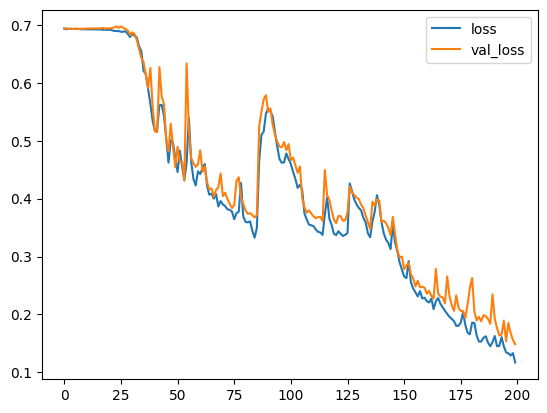

In [26]:
#plot loss vs val_loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()


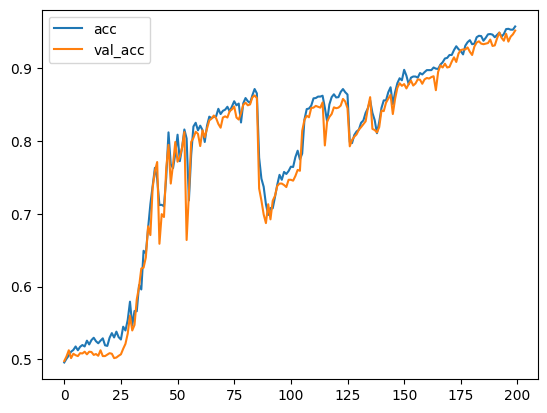

In [27]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label = "val_acc")
plt.legend()

#LSTM is able to pick up the pattern which is 20 steps behind.However, it takes much more iterations to decrease the loss.

In [28]:
#now we use GRU for new sequence
inputs = np.expand_dims(X, -1) # here a new dimension is added to X array (-1 refers to the last of the array).

i = Input(shape=(T,D)) #here the input layer is of the (T,D) where T is sequence length and D represents no. of features.
x = GRU(5)(i) #GRU layer with 5 units per neuron applied to each i
x = Dense(1, activation='sigmoid')(x) # 1 unit in the output layer

model = Model(i,x)
model.compile(
    loss = 'binary_crossentropy',
    optimizer = Adam(learning_rate=0.01),
    metrics = ['accuracy'],
)

#train the model
r = model.fit(
    inputs, Y,    # input data and corresponding target label
    epochs = 400, validation_split=0.5 #here half of the data is used to validation and other half is used for actual training
)

Epoch 1/400
79/79 [==============================] - 5s 31ms/step - loss: 0.6963 - accuracy: 0.4960 - val_loss: 0.6940 - val_accuracy: 0.5064
Epoch 2/400
79/79 [==============================] - 1s 14ms/step - loss: 0.6941 - accuracy: 0.4968 - val_loss: 0.6933 - val_accuracy: 0.5020
Epoch 3/400
79/79 [==============================] - 1s 15ms/step - loss: 0.6935 - accuracy: 0.5156 - val_loss: 0.6933 - val_accuracy: 0.5032
Epoch 4/400
79/79 [==============================] - 1s 14ms/step - loss: 0.6936 - accuracy: 0.5092 - val_loss: 0.6931 - val_accuracy: 0.5084
Epoch 5/400
79/79 [==============================] - 1s 16ms/step - loss: 0.6939 - accuracy: 0.5212 - val_loss: 0.6940 - val_accuracy: 0.5048
Epoch 6/400
79/79 [==============================] - 2s 21ms/step - loss: 0.6924 - accuracy: 0.5132 - val_loss: 0.6931 - val_accuracy: 0.5048
Epoch 7/400
79/79 [==============================] - 2s 22ms/step - loss: 0.6928 - accuracy: 0.5108 - val_loss: 0.6936 - val_accuracy: 0.5060
Epoch 

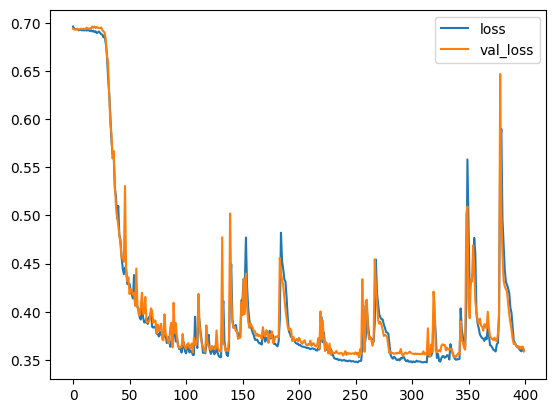

In [29]:
#plot loss vs val_loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

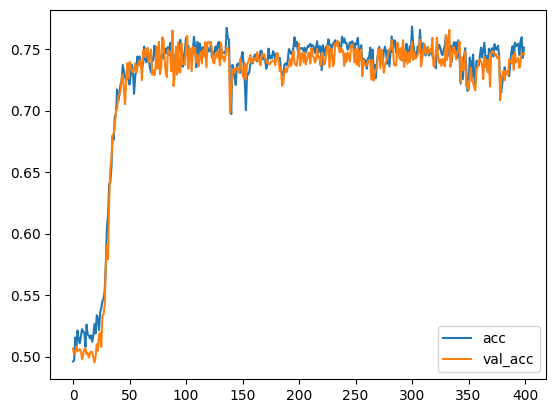

In [30]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label = "val_acc")
plt.legend()

#With GRU, we have used 400 iterations but GRU doesn't get a good accuracy or a loss .

In [31]:
#now we again increase the sequence length
T = 30
D = 1
X = []
Y = []

for i in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x,0,1,2) #long dist.
  Y.append(y)

#array conversion
Y = np.array(Y)
X = np.array(X)
N = len(X)

In [32]:
#now we use LSTM for new sequence
inputs = np.expand_dims(X, -1) # here a new dimension is added to X array (-1 refers to the last of the array).

i = Input(shape=(T,D)) #here the input layer is of the (T,D) where T is sequence length and D represents no. of features.
x = LSTM(5)(i) #LSTM layer with 5 units per neuron applied to each i
x = Dense(1, activation='sigmoid')(x) # 1 unit in the output layer

model = Model(i,x)
model.compile(
    loss = 'binary_crossentropy',
    optimizer = Adam(learning_rate=0.01),
    metrics = ['accuracy'],
)

#train the model
r = model.fit(
    inputs, Y,    # input data and corresponding target label
    epochs = 200, validation_split=0.5 #here half of the data is used to validation and other half is used for actual training
)

Epoch 1/200
79/79 [==============================] - 5s 25ms/step - loss: 0.6950 - accuracy: 0.4908 - val_loss: 0.6941 - val_accuracy: 0.4940
Epoch 2/200
79/79 [==============================] - 1s 18ms/step - loss: 0.6935 - accuracy: 0.5064 - val_loss: 0.6942 - val_accuracy: 0.4804
Epoch 3/200
79/79 [==============================] - 1s 18ms/step - loss: 0.6933 - accuracy: 0.5012 - val_loss: 0.6938 - val_accuracy: 0.4948
Epoch 4/200
79/79 [==============================] - 2s 23ms/step - loss: 0.6931 - accuracy: 0.5168 - val_loss: 0.6934 - val_accuracy: 0.5052
Epoch 5/200
79/79 [==============================] - 2s 25ms/step - loss: 0.6929 - accuracy: 0.5040 - val_loss: 0.6941 - val_accuracy: 0.4984
Epoch 6/200
79/79 [==============================] - 1s 18ms/step - loss: 0.6925 - accuracy: 0.5160 - val_loss: 0.6936 - val_accuracy: 0.4960
Epoch 7/200
79/79 [==============================] - 1s 19ms/step - loss: 0.6927 - accuracy: 0.5124 - val_loss: 0.6951 - val_accuracy: 0.4932
Epoch 

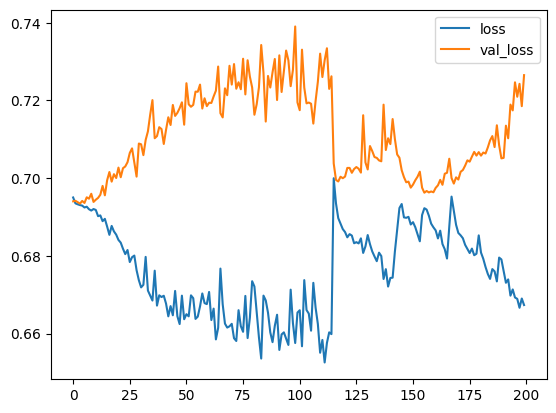

In [33]:
#plot loss vs val_loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

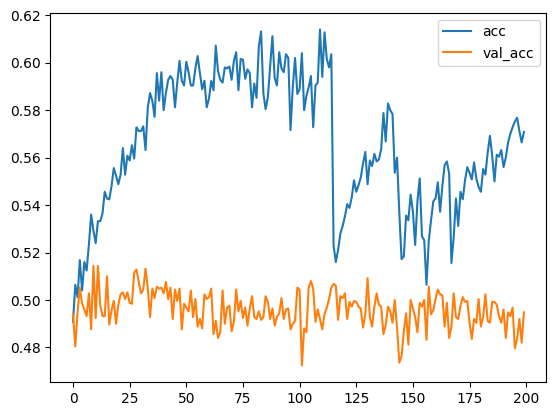

In [34]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label = "val_acc")
plt.legend()


#here with sequence 30, we hit the limit of the LSTM capabilities

In [37]:
#LSTM with global max pooling
from tensorflow.keras.layers import GlobalMaxPool1D

inputs = np.expand_dims(X, -1) # here a new dimension is added to X array (-1 refers to the last of the array).

i = Input(shape=(T,D)) #here the input layer is of the (T,D) where T is sequence length and D represents no. of features.
x = LSTM(5, return_sequences=True)(i) #LSTM by default gives the last hidden state, with return_sequences=True we get all hidden states for each time stamp.

'''
Note:
return_sequences=True: input-TxD
                       after RNN unit(all hidden states revelead) - TxM
                       after global max pooling-M
                       output-K

return_sequences=False: input-TxD
                        after RNN unit(only one hidden state revelead) - M
                        output-K
'''

x = GlobalMaxPool1D()(x)

'''
Note:
GLobalMaxPooling1D (for sequences): give output of size M and finally we pass it to dense layer to get output of K size.
'''



x = Dense(1, activation='sigmoid')(x) # 1 unit in the output layer

model = Model(i,x)
model.compile(
    loss = 'binary_crossentropy',
    optimizer = Adam(learning_rate=0.01),
    metrics = ['accuracy'],
)

#train the model
r = model.fit(
    inputs, Y,    # input data and corresponding target label
    epochs = 100, validation_split=0.5 #here half of the data is used to validation and other half is used for actual training
)

Epoch 1/100
79/79 [==============================] - 5s 29ms/step - loss: 0.6952 - accuracy: 0.4900 - val_loss: 0.6944 - val_accuracy: 0.5136
Epoch 2/100
79/79 [==============================] - 1s 18ms/step - loss: 0.6938 - accuracy: 0.5020 - val_loss: 0.6929 - val_accuracy: 0.5140
Epoch 3/100
79/79 [==============================] - 1s 18ms/step - loss: 0.6935 - accuracy: 0.4972 - val_loss: 0.6940 - val_accuracy: 0.4836
Epoch 4/100
79/79 [==============================] - 2s 24ms/step - loss: 0.6932 - accuracy: 0.5020 - val_loss: 0.6929 - val_accuracy: 0.5132
Epoch 5/100
79/79 [==============================] - 2s 29ms/step - loss: 0.6937 - accuracy: 0.5120 - val_loss: 0.6926 - val_accuracy: 0.5084
Epoch 6/100
79/79 [==============================] - 2s 22ms/step - loss: 0.6929 - accuracy: 0.5044 - val_loss: 0.6946 - val_accuracy: 0.4856
Epoch 7/100
79/79 [==============================] - 1s 19ms/step - loss: 0.6930 - accuracy: 0.5068 - val_loss: 0.6940 - val_accuracy: 0.4968
Epoch 

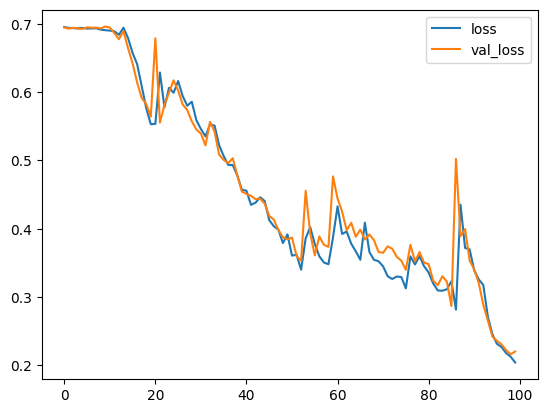

In [38]:
#plot loss vs val_loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

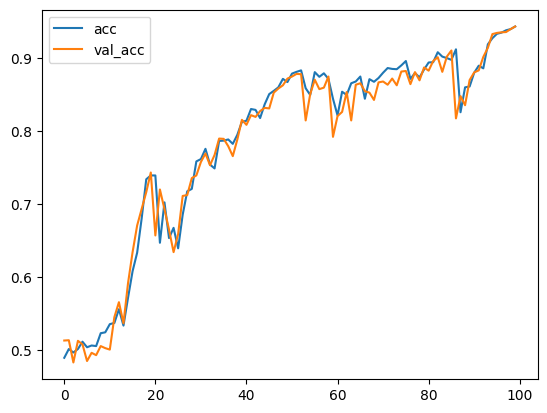

In [39]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label = "val_acc")
plt.legend()


#even the sequence is long (30), LSTM is able to learn the pattern